##### Setup

In addition to standard imports below, make sure to include src in the path so that multivalid tools can be imported.

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

##### Dataset/task construction

We will aim to achieve $\tau$-coverage that holds conditional on groups $g \in \mathcal{G}$, for some collection $\mathcal{G}$ of subsets of the covariate space. 

In the experiments below, we use $\tau = 0.9$ (that is, we want to obtain $90\%$ coverage conditional on every group). 

In [19]:
tau = 0.9
num_groups = 15
num_grid = 100

Our synthetic dataset $\{(x_i, y_i)\}_{i=1}^{10000} \in (\mathbb{Z}_+ \times \mathbb{R})^{10000}$ is generated as follows.

First, we define our group collection as $\mathcal{G} = \{g_1, \ldots, g_{10}\}$, where for each $j = 1, \ldots, 10$, the group $g_j = \{j, 2j, 3j, \ldots\} \subset \mathbb{Z}_+$ contains all multiples of $j$. Note that group $g_1$ encompasses the entire covariate space, thus enforcing the *marginal* coverage guarantee.

Each $x_i$ is a random integer sampled from the range $[1, 5000)$. 

We let the corresponding label $y_i$ be the sum of $n(x_i)$ iid. $\mathcal{N}(0, 1)$ random variables, where $n(x_i)$ is the number of groups that $x_i$ belongs to.

After generating our data, we split it into $80\%$ training data $\mathcal{D}_{train}$ and $20\%$ test data $\mathcal{D}_{test}$.

Here, $g(x) \in \{0, 1\}^{|\mathcal{G}}$ is the vector that indicates which groups $x$ belongs to: namely, $g(x)[j] = \mathbf{1}[x \in g_j]$ for all $j = 1 \ldots |\mathcal{G}|$.

In [20]:
from DatasetGeneration.DivisibleDataset import divisible_dataset

size = 10000
x, y, g = divisible_dataset(size=size, num_groups=num_groups)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##### Multivalid coverage

In [21]:
from MultivalidAlgorithms.MultivalidCoverage import multivalid_coverage, eval_fn

patches = multivalid_coverage(tau=tau, x_train=x_train, y_train=y_train, num_grid=num_grid, group_fn=g)
multivalid_model = lambda x: eval_fn(x, patches=patches, num_grid=num_grid, group_fn=g)

Max violation in round 0  :  6449.436125
Update: (0, 0, 75)
Max violation in round 1  :  27.326795338674458
Update: (5, 75, 81)
Max violation in round 2  :  9.78905839746489
Update: (0, 75, 72)
Max violation in round 3  :  14.590843373493978
Update: (3, 72, 77)
Max violation in round 4  :  4.57996282527881
Update: (14, 72, 78)
Max violation in round 5  :  4.653876739562618
Update: (0, 72, 70)
Max violation in round 6  :  7.364196891191715
Update: (13, 70, 79)
Max violation in round 7  :  2.4979646017699104
Update: (8, 70, 74)
Max violation in round 8  :  2.2699224806201563
Update: (9, 70, 74)
Max violation in round 9  :  3.0650943396226467
Update: (0, 70, 68)
Max violation in round 10  :  2.8800000000000003
Update: (12, 68, 72)
Max violation in round 11  :  1.825280898876406
Update: (6, 68, 72)
Max violation in round 12  :  1.4459039629736727
Update: (0, 68, 67)
Max violation in round 13  :  1.81091388400703
Update: (2, 67, 70)
Max violation in round 14  :  1.238240997229915
Update: (0

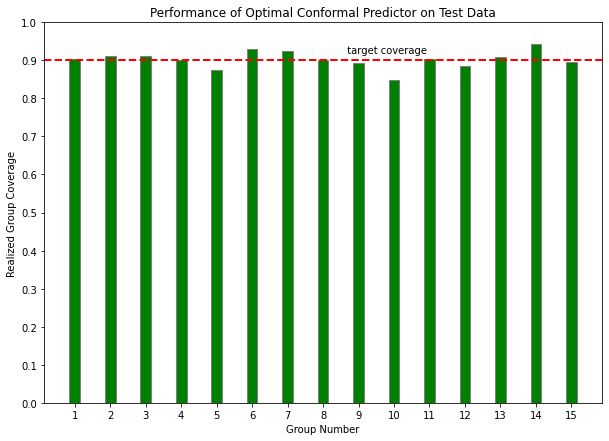

Coverage on group 1 : 0.9045
Coverage on group 2 : 0.9125514403292181
Coverage on group 3 : 0.9108761329305136
Coverage on group 4 : 0.9006211180124224
Coverage on group 5 : 0.8733509234828496
Coverage on group 6 : 0.9292929292929293
Coverage on group 7 : 0.9243421052631579
Coverage on group 8 : 0.899581589958159
Coverage on group 9 : 0.8923766816143498
Coverage on group 10 : 0.8494623655913979
Coverage on group 11 : 0.9044943820224719
Coverage on group 12 : 0.8848920863309353
Coverage on group 13 : 0.9084507042253521
Coverage on group 14 : 0.9433962264150944
Coverage on group 15 : 0.8951612903225806


In [22]:
from utils.MultivalidPlotting import plot_group_coverage

plot_group_coverage(model=multivalid_model, tau=tau, x_test=x_test, y_test=y_test, num_groups=num_groups, group_fn=g, multivalid=False, verbose=True)

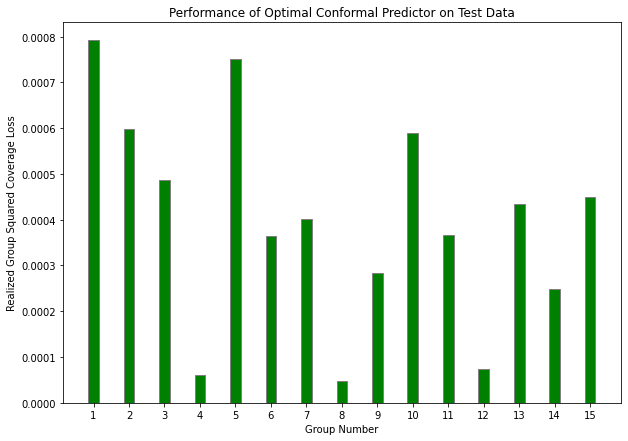

Performance on group 1 : 0.0007918227790855672
Performance on group 2 : 0.0005986842954308617
Performance on group 3 : 0.00048635317744601884
Performance on group 4 : 6.091510344557488e-05
Performance on group 5 : 0.0007506567449798507
Performance on group 6 : 0.0003643082013183837
Performance on group 7 : 0.0004018520443520443
Performance on group 8 : 4.654773541870314e-05
Performance on group 9 : 0.0002830914047193118
Performance on group 10 : 0.0005896923756255518
Performance on group 11 : 0.00036638030828820277
Performance on group 12 : 7.297613673979108e-05
Performance on group 13 : 0.00043537800363887316
Performance on group 14 : 0.0002491666666666666
Performance on group 15 : 0.00044932604735883403


In [23]:
plot_group_coverage(model=multivalid_model, tau=tau, x_test=x_test, y_test=y_test, num_groups=num_groups, group_fn=g, multivalid=True, num_grid=num_grid, verbose=True)

##### Group-only (not multivalid) coverage

In [24]:
!pip install optax

from MultivalidAlgorithms.GroupCoverage import group_coverage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
group_model, theta_opt = group_coverage(tau=tau, x_train=x_train, y_train=y_train, num_groups=num_groups, group_fn=g)


Optimal theta found: [ 0.6351701   0.06942544  0.07058934  0.03890205  0.05674157 -0.00216989
  0.05116966  0.02595287  0.02349506 -0.02406407  0.03343523 -0.02168043
  0.03828627  0.00748974 -0.00160039]


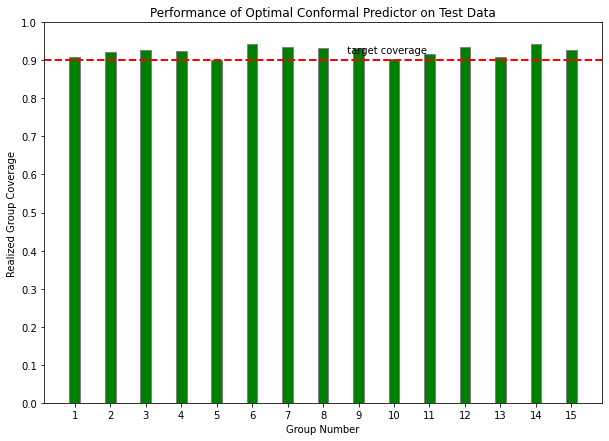

Coverage on group 1 : 0.909
Coverage on group 2 : 0.9207818930041153
Coverage on group 3 : 0.9274924471299094
Coverage on group 4 : 0.9233954451345756
Coverage on group 5 : 0.899736147757256
Coverage on group 6 : 0.9427609427609428
Coverage on group 7 : 0.9342105263157895
Coverage on group 8 : 0.9330543933054394
Coverage on group 9 : 0.9327354260089686
Coverage on group 10 : 0.9032258064516129
Coverage on group 11 : 0.9157303370786517
Coverage on group 12 : 0.935251798561151
Coverage on group 13 : 0.9084507042253521
Coverage on group 14 : 0.9433962264150944
Coverage on group 15 : 0.9274193548387096


In [26]:
plot_group_coverage(model=group_model, tau=tau, x_test=x_test, y_test=y_test, num_groups=num_groups, group_fn=g, multivalid=False, verbose=True)

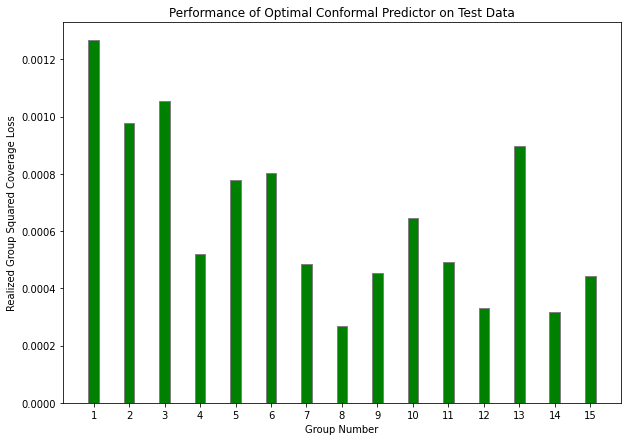

Performance on group 1 : 0.001266091978569711
Performance on group 2 : 0.000978558224467286
Performance on group 3 : 0.0010529156642946973
Performance on group 4 : 0.0005205724198340388
Performance on group 5 : 0.0007793438307724022
Performance on group 6 : 0.0008031997791886439
Performance on group 7 : 0.0004842995111783357
Performance on group 8 : 0.00026699900202996167
Performance on group 9 : 0.00045496673824260014
Performance on group 10 : 0.0006450966183574879
Performance on group 11 : 0.0004917054325103861
Performance on group 12 : 0.00033195652173913026
Performance on group 13 : 0.000895958485958486
Performance on group 14 : 0.00031818229506111977
Performance on group 15 : 0.0004443055555555557


In [27]:
plot_group_coverage(model=group_model, tau=tau, x_test=x_test, y_test=y_test, num_groups=num_groups, group_fn=g, multivalid=True, num_grid=num_grid, verbose=True)